# 重回帰分析

In [1]:
#データの準備

#ライブラリの読み込み
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#データの読み込み
from sklearn.datasets import load_boston
boston=load_boston()
data=boston.data
target=boston.target
#データフレームの作成
df_data=pd.DataFrame(data,columns=boston.feature_names)
df_target=pd.DataFrame(target,columns=["MEDV"])
df=pd.concat([df_data,df_target],axis=1)

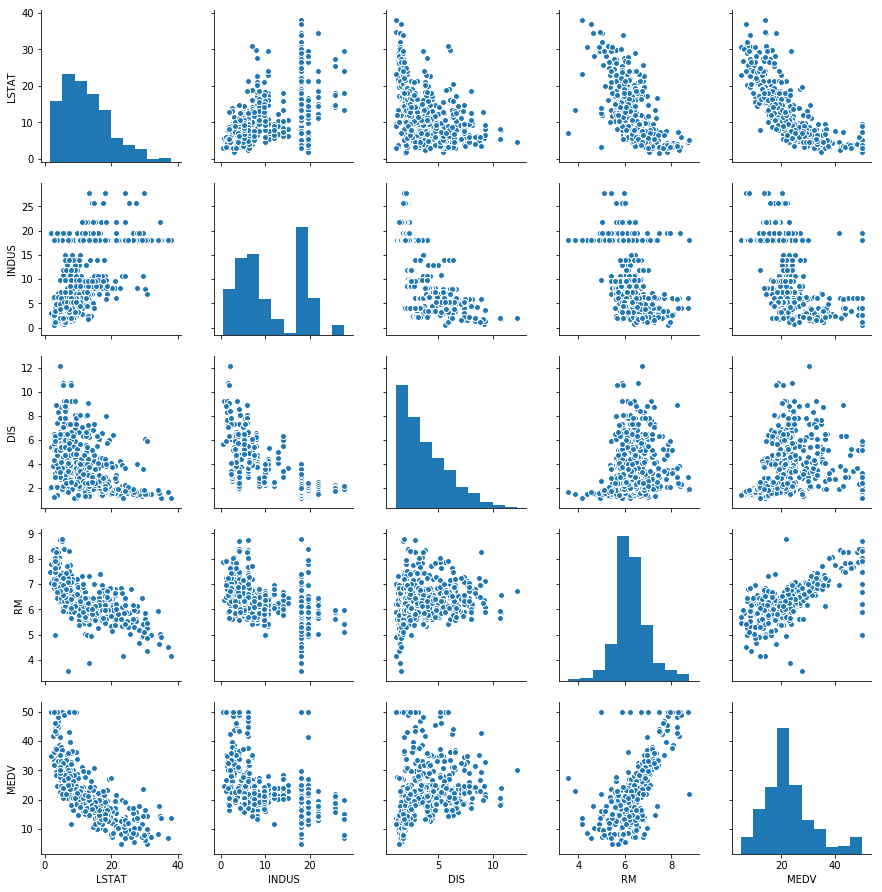

In [2]:
#データの観察

#特徴量の一部と目的変数をピックアップ
df_pickup=df.loc[:,["LSTAT","INDUS","DIS","RM","MEDV"]]
#散布図行列を出力
import seaborn as sns
sns.pairplot(df_pickup)

In [4]:
#データの観察

#相関係数行列を出力
df_pickup.corr()

,LSTAT,INDUS,DIS,RM,MEDV
LSTAT,1.000000,0.603800,-0.496996,-0.613808,-0.737663
INDUS,0.603800,1.000000,-0.708027,-0.391676,-0.483725
DIS,-0.496996,-0.708027,1.000000,0.205246,0.249929
RM,-0.613808,-0.391676,0.205246,1.000000,0.695360
MEDV,-0.737663,-0.483725,0.249929,0.695360,1.000000


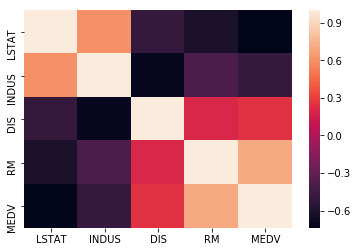

In [5]:
#データの観察

#ヒートマップの出力
sns.heatmap(df_pickup.corr())

In [6]:
#データの分割

#モデルに組み込む特徴量を選択
X=df.loc[:,["LSTAT","RM"]].values
y=df.loc[:,["MEDV"]].values
#データの分割
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                    test_size=0.3)

In [7]:
#データの学習
from sklearn.linear_model import LinearRegression
model_linear=LinearRegression()
model_linear.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
#モデルの確認・評価

#回帰係数の出力
print("coef:",model_linear.coef_)
print("intercept:",model_linear.intercept_)
print("")
#精度(決定係数)の出力
print("R^2 train:",model_linear.score(X_train,y_train))
print("R^2 test:",model_linear.score(X_test,y_test))
print("")
#精度(自由度調整済み決定係数)の出力
def adjusted(score, n_sample, n_features):
    adjusted_score = 1 - (1 - score) * ((n_sample - 1) / (n_sample - n_features - 1))
    return adjusted_score
print("adjusted R^2 train:",
      adjusted(model_linear.score(X_train,y_train),len(X_train),2))
print("adjusted R^2 test:",
      adjusted(model_linear.score(X_test,y_test),len(X_test),2))
print("")
#精度(RMSE)の出力
from sklearn.metrics import mean_squared_error as mse
print("RMSE train:",(mse(y_train,model_linear.predict(X_train)))**(1/2))
print("RMSE test:",(mse(y_test,model_linear.predict(X_test)))**(1/2))

coef: [[-0.63744033  5.10414047]]
intercept: [-1.43466062]

R^2 train: 0.6323497497146562
R^2 test: 0.6522847489325944

adjusted R^2 train: 0.6302548764936571
adjusted R^2 test: 0.6476174301263204

RMSE train: 5.582657897313672
RMSE test: 5.38518288051861


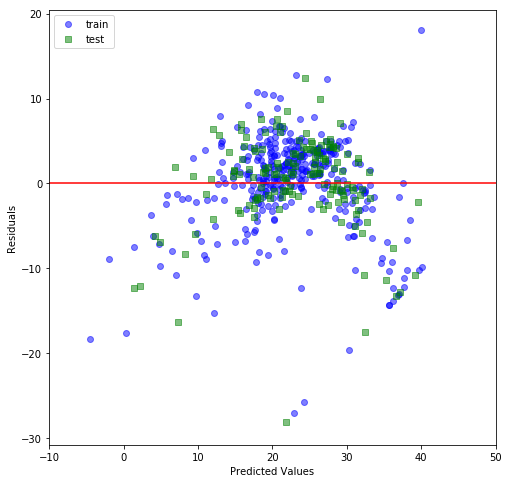

In [9]:
#モデルの確認・評価

# 残差プロットを行う関数を定義
def res_plot(y_train, y_train_pred, y_test, y_test_pred):
    # train, testごとに残差を算出
    res_train = y_train_pred - y_train
    res_test  = y_test_pred - y_test
    
    # train, testごとに(予測値, 残差)をプロット
    plt.figure(figsize=(8, 8))
    plt.scatter(y_train_pred, res_train, color='blue', marker='o', label='train', alpha=0.5)
    plt.scatter(y_test_pred, res_test, color='green', marker='s', label='test', alpha=0.5)
    
    plt.xlabel('Predicted Values')                  # x軸のラベルを表示
    plt.ylabel('Residuals')                         # y軸のラベルを表示
    plt.legend(loc='upper left')                    # 凡例を左上に表示
    plt.hlines(y=0, xmin=-10, xmax=50, color='red') # 残差0の線を表示
    plt.xlim([-10, 50])                             # 表示する横軸の範囲を指定
    plt.show()
#残差プロットを出力
res_plot(y_train,model_linear.predict(X_train),y_test,model_linear.predict(X_test))

In [17]:
#標準偏回帰係数の確認

#データの標準化
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
data_std=ss.fit_transform(data)
target_std=ss.fit_transform(target.reshape(-1,1))
#データの学習
from sklearn.linear_model import LinearRegression
model_linear_std=LinearRegression()
model_linear_std.fit(data_std,target_std)
#標準偏回帰係数の確認
model_linear_std.coef_

array([[-0.10017523,  0.1176512 ,  0.01556018,  0.0742493 , -0.22421527,
         0.29066587,  0.00229872, -0.3378803 ,  0.28937562, -0.22593552,
        -0.22443985,  0.09323458, -0.40799686]])